In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [ ]:
df = pd.read_csv("dfDayAverageFill.csv", parse_dates=True)

In [ ]:
df.head()

,Unnamed: 0,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
0,2019-01-01,3.056551,3.250489,3.299464,3.056551,3.056551,3.056551,3.056551,3.056551,3.056551,...,4.416822,3.838969,2.500578,0.889003,4.452825,7.286048,15.483550,13.194495,2.082059,6.263580
1,2019-01-02,6.887260,6.887260,6.887260,1.704597,4.054153,4.054153,4.054153,4.054153,3.803428,...,0.200202,1.480429,2.754286,1.408165,6.405930,9.405160,10.947682,7.728424,7.014205,3.503205
2,2019-01-03,3.793855,3.793855,3.793855,3.793855,3.793855,3.793855,3.793855,1.201210,2.846237,...,6.023230,3.793855,3.793855,1.589649,4.327756,9.193494,10.059291,11.579663,13.085476,12.792488
3,2019-01-04,8.331980,3.183740,3.183740,3.183740,2.372771,4.177838,4.177838,2.980271,4.543188,...,3.028430,4.177838,4.177838,2.990681,8.223368,10.660707,10.022091,3.645186,8.395692,6.363844
4,2019-01-05,0.585013,1.564346,1.564346,1.564346,1.564346,1.564346,1.564346,1.564346,0.236389,...,1.564346,3.550512,11.398530,11.468159,6.495711,2.350000,1.564346,1.564346,1.564346,1.564346


In [ ]:
df.dtypes

Unnamed: 0     object
00:00:00      float64
01:00:00      float64
02:00:00      float64
03:00:00      float64
04:00:00      float64
05:00:00      float64
06:00:00      float64
07:00:00      float64
08:00:00      float64
09:00:00      float64
10:00:00      float64
11:00:00      float64
12:00:00      float64
13:00:00      float64
14:00:00      float64
15:00:00      float64
16:00:00      float64
17:00:00      float64
18:00:00      float64
19:00:00      float64
20:00:00      float64
21:00:00      float64
22:00:00      float64
23:00:00      float64
dtype: object

In [ ]:
df.columns = ["TimeStamp"] + [i for i in df.columns[1::]]

In [ ]:

import datetime

In [ ]:
timeStamps = list(df.TimeStamp)
for idx, val in enumerate(timeStamps):
    timeStamps[idx] = datetime.datetime.strptime(val, "%Y-%m-%d").date()
# df["TimeStamp"] = timeStamps

In [ ]:
timeStamps[0]
df["TimeStamp"] = timeStamps

In [ ]:
list(df["TimeStamp"])[0]

datetime.date(2019, 1, 1)

In [ ]:
df.head()

,TimeStamp,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
0,2019-01-01,3.056551,3.250489,3.299464,3.056551,3.056551,3.056551,3.056551,3.056551,3.056551,...,4.416822,3.838969,2.500578,0.889003,4.452825,7.286048,15.483550,13.194495,2.082059,6.263580
1,2019-01-02,6.887260,6.887260,6.887260,1.704597,4.054153,4.054153,4.054153,4.054153,3.803428,...,0.200202,1.480429,2.754286,1.408165,6.405930,9.405160,10.947682,7.728424,7.014205,3.503205
2,2019-01-03,3.793855,3.793855,3.793855,3.793855,3.793855,3.793855,3.793855,1.201210,2.846237,...,6.023230,3.793855,3.793855,1.589649,4.327756,9.193494,10.059291,11.579663,13.085476,12.792488
3,2019-01-04,8.331980,3.183740,3.183740,3.183740,2.372771,4.177838,4.177838,2.980271,4.543188,...,3.028430,4.177838,4.177838,2.990681,8.223368,10.660707,10.022091,3.645186,8.395692,6.363844
4,2019-01-05,0.585013,1.564346,1.564346,1.564346,1.564346,1.564346,1.564346,1.564346,0.236389,...,1.564346,3.550512,11.398530,11.468159,6.495711,2.350000,1.564346,1.564346,1.564346,1.564346


In [ ]:
temp = df.copy()

In [ ]:
temp.set_index("TimeStamp", inplace = True)
# temp.index.freq = "H"

In [ ]:
temp.index = pd.to_datetime(temp.index)

In [ ]:
temp.index.freq = "D"

In [ ]:
temp.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='TimeStamp', length=365, freq='D')

In [ ]:
temp.shape

(365, 24)

In [ ]:
temp.tail(1)

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2019-12-31,9.460879,4.540586,3.252308,3.252308,3.252308,3.252308,0.931425,4.499447,9.26686,1.032727,...,3.375385,4.912429,6.440958,1.455567,3.25,3.25,3.25,3.25,5.701546,8.840828


In [ ]:
# temp = temp[:365]

In [ ]:
# temp = temp[:355]

In [ ]:
train_df,test_df = temp[1:int(0.8*temp.shape[0])], temp[int(0.8*temp.shape[0]):] 

In [ ]:
train_df

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2019-01-02,6.887260,6.887260,6.887260,1.704597,4.054153,4.054153,4.054153,4.054153,3.803428,5.390000,...,0.200202,1.480429,2.754286,1.408165,6.405930,9.405160,10.947682,7.728424,7.014205,3.503205
2019-01-03,3.793855,3.793855,3.793855,3.793855,3.793855,3.793855,3.793855,1.201210,2.846237,7.608958,...,6.023230,3.793855,3.793855,1.589649,4.327756,9.193494,10.059291,11.579663,13.085476,12.792488
2019-01-04,8.331980,3.183740,3.183740,3.183740,2.372771,4.177838,4.177838,2.980271,4.543188,4.553022,...,3.028430,4.177838,4.177838,2.990681,8.223368,10.660707,10.022091,3.645186,8.395692,6.363844
2019-01-05,0.585013,1.564346,1.564346,1.564346,1.564346,1.564346,1.564346,1.564346,0.236389,1.564346,...,1.564346,3.550512,11.398530,11.468159,6.495711,2.350000,1.564346,1.564346,1.564346,1.564346
2019-01-06,1.580677,1.580677,1.580677,1.580677,1.580677,1.580677,1.580677,3.176887,7.266207,4.514429,...,1.580677,1.580677,0.021998,0.971409,3.284789,6.272066,7.651471,2.471743,1.439399,1.580677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-15,6.352313,6.352313,6.352313,6.352313,6.352313,0.911837,3.118986,9.475092,20.997636,19.534915,...,0.002248,4.538530,4.975540,2.506556,3.491250,3.990000,6.524080,6.304000,3.458444,6.352313
2019-10-16,5.899172,5.899172,5.899172,5.899172,5.899172,5.899172,5.899172,2.411031,5.227564,0.632281,...,0.974938,0.778167,3.170901,6.918761,13.108652,9.556138,16.749668,25.988309,23.924256,4.366600
2019-10-17,8.119177,8.119177,8.119177,8.119177,8.119177,8.119177,12.983181,20.175548,24.205178,13.724907,...,14.104544,8.119177,1.193030,5.982443,14.369646,15.107927,10.046045,5.067536,3.431505,2.035540


In [ ]:
train = train_df
scalers={}
for i in train_df.columns:
    scaler = MinMaxScaler(feature_range=(-1,1))
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    train[i]=s_s
test = test_df
for i in train_df.columns:
    scaler = scalers['scaler_'+i]
    s_s = scaler.transform(test[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+i] = scaler
    test[i]=s_s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [ ]:
train

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2019-01-02,-0.235826,-0.210239,0.288289,-0.643554,-0.065737,-0.065737,-0.375476,-0.712598,-0.812578,-0.770779,...,-0.980781,-0.847845,-0.739896,-0.885772,-0.485520,-0.179073,-0.119662,-0.427565,-0.435347,-0.637355
2019-01-03,-0.579054,-0.564959,-0.290344,-0.206672,-0.125722,-0.125722,-0.415574,-0.914845,-0.859745,-0.676414,...,-0.421789,-0.610076,-0.641724,-0.871051,-0.652425,-0.197549,-0.191101,-0.142308,0.053399,0.324255
2019-01-04,-0.075527,-0.634921,-0.404469,-0.334252,-0.453205,-0.037235,-0.356423,-0.788726,-0.776124,-0.806374,...,-0.709281,-0.570611,-0.605462,-0.757402,-0.339556,-0.069483,-0.194092,-0.730005,-0.324135,-0.341227
2019-01-05,-0.935090,-0.820617,-0.707383,-0.672881,-0.639503,-0.639503,-0.759020,-0.889102,-0.988351,-0.933473,...,-0.849828,-0.635086,0.076431,-0.069725,-0.478310,-0.794881,-0.874206,-0.884131,-0.874068,-0.838062
2019-01-06,-0.824616,-0.818744,-0.704328,-0.669466,-0.635739,-0.635739,-0.756504,-0.774788,-0.641942,-0.808015,...,-0.848260,-0.837541,-0.997923,-0.921201,-0.736189,-0.452544,-0.384721,-0.816921,-0.884126,-0.836371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-15,-0.295180,-0.271581,0.188226,0.328325,0.463864,-0.789871,-0.519534,-0.328304,0.034705,-0.169238,...,-0.999784,-0.533539,-0.530130,-0.796673,-0.719607,-0.651734,-0.475378,-0.533070,-0.721591,-0.342420
2019-10-16,-0.345459,-0.323542,0.103464,0.233569,0.359440,0.359440,-0.091259,-0.829080,-0.742400,-0.973111,...,-0.906409,-0.920022,-0.700553,-0.438763,0.052796,-0.165895,0.346894,0.924923,0.925935,-0.547978
2019-10-17,-0.099138,-0.068975,0.518725,0.697791,0.871031,0.871031,1.000000,0.430260,0.192764,-0.416321,...,0.353990,-0.165528,-0.887335,-0.514716,0.154070,0.318691,-0.192166,-0.624654,-0.723759,-0.789285


In [ ]:

def split_series(series, n_past, n_future):
  
  X, y = list(), list()
  for window_start in range(len(series)):
    past_end = window_start + n_past
    future_end = past_end + n_future
    if future_end > len(series):
      break
    # slicing the past and future parts of the window
    past, future = series[window_start:past_end, :], series[past_end:future_end, :]
    X.append(past)
    y.append(future)
  return np.array(X), np.array(y)

In [ ]:
n_past = 14
n_future = 1
n_features = 24

In [ ]:
train.shape

(291, 24)

In [ ]:
X_train, y_train = split_series(train.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))
X_test, y_test = split_series(test.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))

In [ ]:
# E2D2
# n_features ==> no of features at each timestep in the data.
#
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(100,return_sequences = True, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)
encoder_states1 = encoder_outputs1[1:]

# encoder_l3 = tf.keras.layers.LSTM(100, return_sequences = True, return_state = True)
# encoder_outputs3 = encoder_l3(encoder_outputs1)
# encoder_states3 = encoder_outputs3[1:]



encoder_l2 = tf.keras.layers.LSTM(100, return_state=True)
encoder_outputs2 = encoder_l2(encoder_outputs1[0])
encoder_states2 = encoder_outputs1[1:]
#
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs2[0])
#
decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
# decoder_l3 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_l1,initial_state = encoder_states3)
decoder_l2 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_l1,initial_state = encoder_states2)
decoder_outputs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l2)
#
model_e2d2 = tf.keras.models.Model(encoder_inputs,decoder_outputs2)
#
model_e2d2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 14, 24)]     0           []                               
                                                                                                  
 lstm_4 (LSTM)                  [(None, 14, 100),    50000       ['input_2[0][0]']                
                                 (None, 100),                                                     
                                 (None, 100)]                                                     
                                                                                                  
 lstm_5 (LSTM)                  [(None, 100),        80400       ['lstm_4[0][0]']                 
                                 (None, 100),                                               

In [ ]:
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
model_e2d2.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e2d2=model_e2d2.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),batch_size=32,verbose=1,callbacks=[reduce_lr])

Epoch 1/25
9/9 [==============================] - 9s 275ms/step - loss: 0.1130 - val_loss: 0.0816 - lr: 0.0010
Epoch 2/25
9/9 [==============================] - 0s 35ms/step - loss: 0.0606 - val_loss: 0.0777 - lr: 9.5000e-04
Epoch 3/25
9/9 [==============================] - 0s 35ms/step - loss: 0.0580 - val_loss: 0.0756 - lr: 9.0250e-04
Epoch 4/25
9/9 [==============================] - 0s 35ms/step - loss: 0.0564 - val_loss: 0.0741 - lr: 8.5737e-04
Epoch 5/25
9/9 [==============================] - 0s 36ms/step - loss: 0.0557 - val_loss: 0.0730 - lr: 8.1451e-04
Epoch 6/25
9/9 [==============================] - 0s 36ms/step - loss: 0.0555 - val_loss: 0.0740 - lr: 7.7378e-04
Epoch 7/25
9/9 [==============================] - 0s 36ms/step - loss: 0.0553 - val_loss: 0.0732 - lr: 7.3509e-04
Epoch 8/25
9/9 [==============================] - 0s 35ms/step - loss: 0.0552 - val_loss: 0.0731 - lr: 6.9834e-04
Epoch 9/25
9/9 [==============================] - 0s 35ms/step - loss: 0.0552 - val_loss: 0

In [ ]:

pred_e2d2=model_e2d2.predict(X_test)

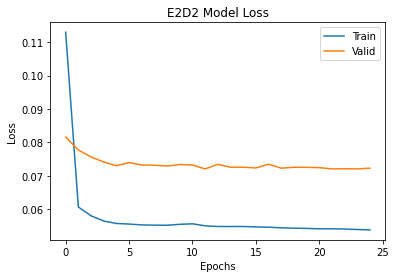

In [ ]:

plt.plot(history_e2d2.history['loss'])
plt.plot(history_e2d2.history['val_loss'])
plt.title("E2D2 Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Valid'])
plt.show()

In [ ]:
for index,i in enumerate(train_df.columns):
    scaler = scalers['scaler_'+i]
    # pred1_e1d1[:,:,index]=scaler.inverse_transform(pred1_e1d1[:,:,index])
    # pred_e1d1[:,:,index]=scaler.inverse_transform(pred_e1d1[:,:,index])
    # pred1_e2d2[:,:,index]=scaler.inverse_transform(pred1_e2d2[:,:,index])
    pred_e2d2[:,:,index]=scaler.inverse_transform(pred_e2d2[:,:,index])
    y_train[:,:,index]=scaler.inverse_transform(y_train[:,:,index])
    y_test[:,:,index]=scaler.inverse_transform(y_test[:,:,index])

In [ ]:
len(y_test[0][0])

24

In [ ]:

y_train[0][0], y_test[0][0]

(array([2.94840295, 2.94840295, 0.02047502, 1.97305568, 1.97305568,
        1.97305568, 1.97305568, 1.19228687, 2.94639894, 3.84227844,
        0.43769798, 1.97305568, 1.97305568, 0.49414167, 3.01      ,
        2.52505556, 1.97305568, 0.95709268, 4.61538462, 4.61538462,
        5.88745978, 2.59841459, 2.5934139 , 5.72104586]),
 array([ 4.42476161,  4.42476161,  4.42476161,  4.42476161,  3.71409136,
         4.15111111,  4.15111111,  4.15111111,  2.98506986,  3.28250064,
        10.46338757, 10.46338757,  8.76159055,  5.13084803,  5.43355263,
         8.42633801,  5.62960057,  3.3026954 ,  4.42476161,  4.42476161,
         5.75781696,  5.69742821,  7.689823  ,  7.00281496]))

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y_test[1][0], pred_e2d2[1][0])

1.9760418173468175

In [ ]:
i = 0

In [ ]:
mean_absolute_error(y_test[i][0], pred_e2d2[i][0]) / np.mean(y_test[i][0])

0.3606198606852446

In [ ]:
len(y_test[0][0]), len(pred_e2d2[0][0])

(24, 24)

In [ ]:
yTestUnpacked = []
for i in y_test:
  yTestUnpacked.extend(i[0])

predsUnpacked = []
for i in pred_e2d2:
  predsUnpacked.extend(i[0])

In [ ]:
len(yTestUnpacked), len(predsUnpacked)

(1416, 1416)

In [ ]:
mean_absolute_error(yTestUnpacked, predsUnpacked) / np.mean(yTestUnpacked)

0.5476787026151843

In [ ]:
len(yTestUnpacked), len(predsUnpacked)

(1416, 1416)

In [ ]:
len(yTestUnpacked) / 24, len(df) * 0.2

(59.0, 73.0)

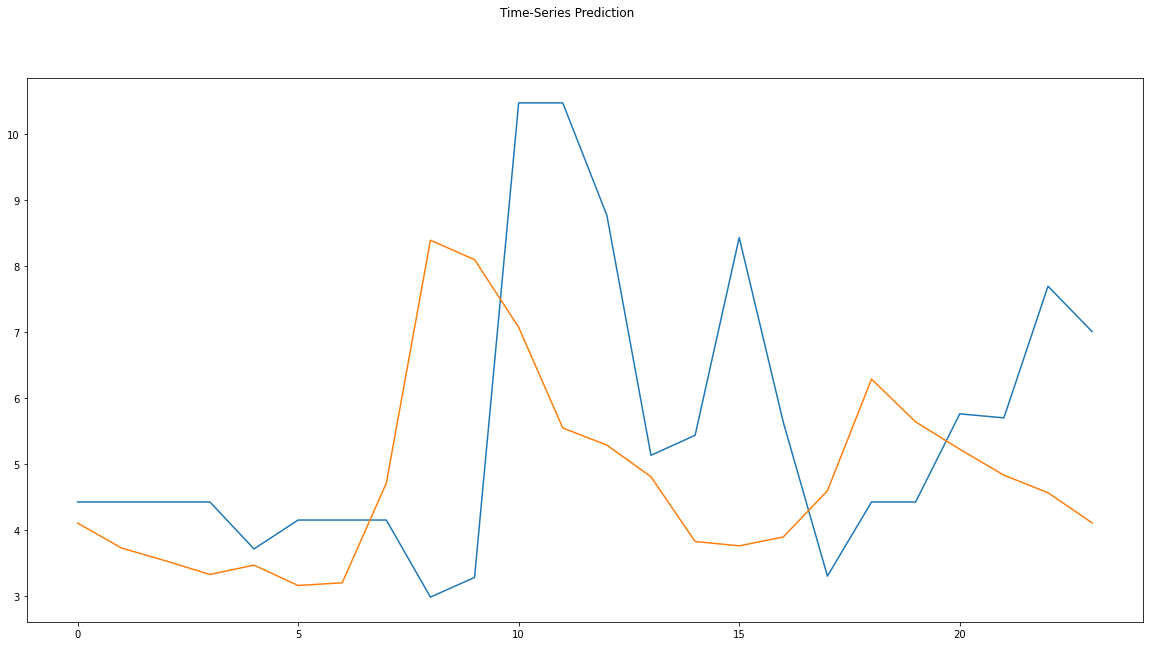

In [ ]:
plt.figure(figsize = (20, 10))
i = 24
plt.plot(yTestUnpacked[:i])
plt.plot(predsUnpacked[:i])
plt.suptitle('Time-Series Prediction')
plt.show()

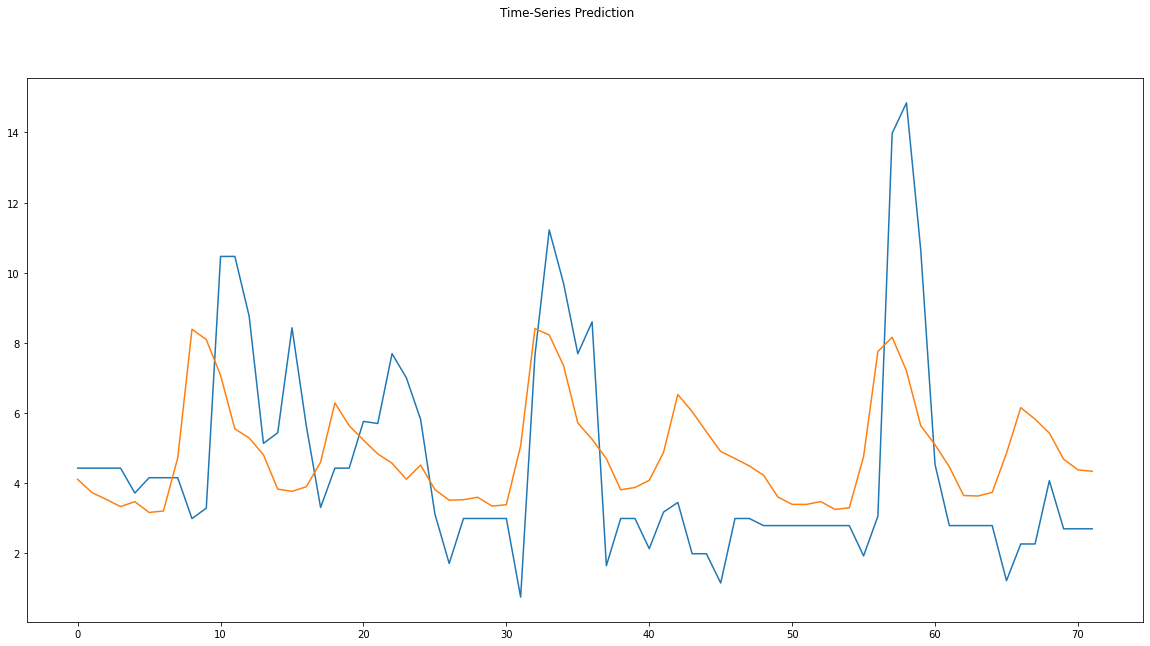

In [ ]:
plt.figure(figsize = (20, 10))
i = 24 * 3
plt.plot(yTestUnpacked[:i])
plt.plot(predsUnpacked[:i])
plt.suptitle('Time-Series Prediction')
plt.show()

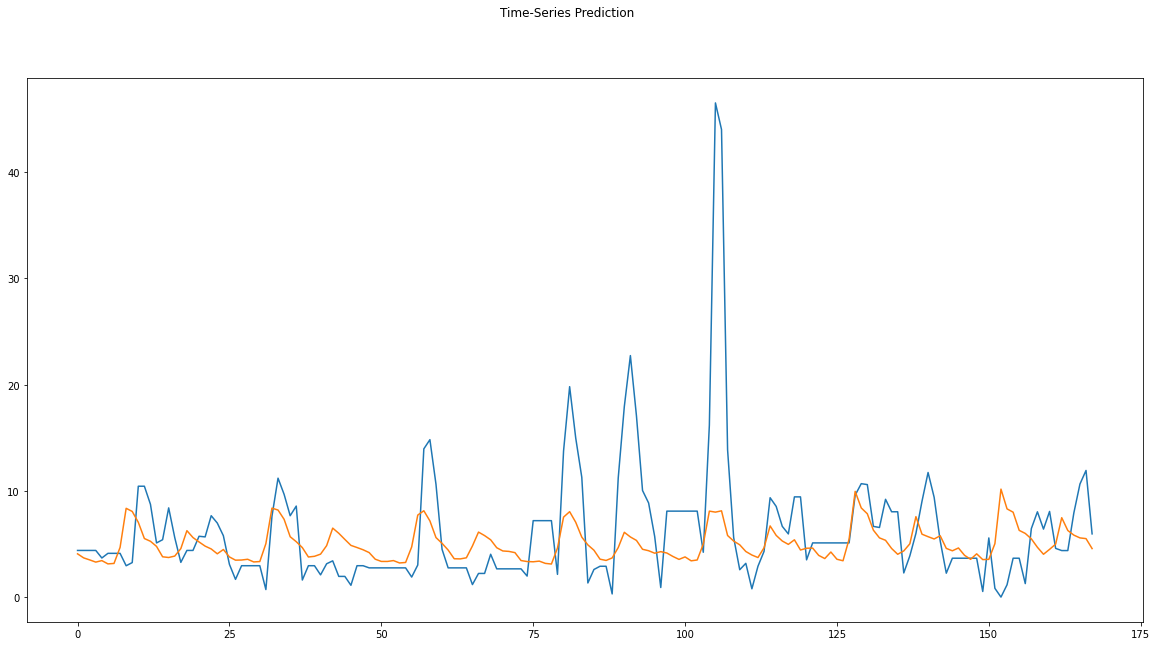

In [ ]:
plt.figure(figsize = (20, 10))
i = 24 * 7
plt.plot(yTestUnpacked[:i])
plt.plot(predsUnpacked[:i])
plt.suptitle('Time-Series Prediction')
plt.show()

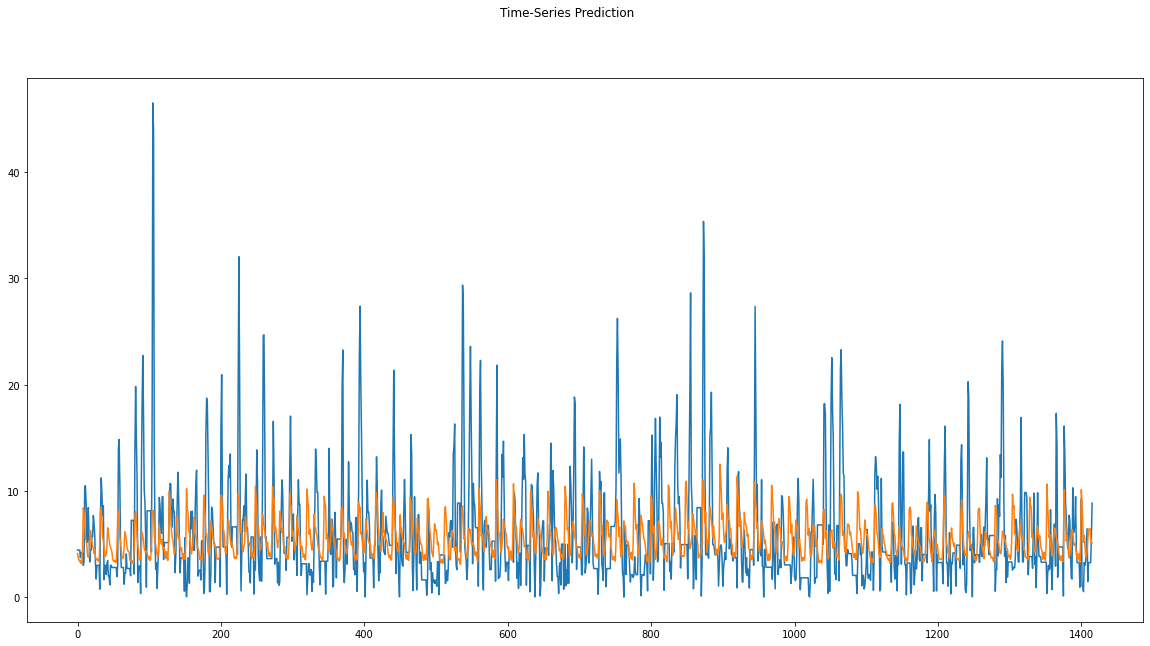

In [ ]:
plt.figure(figsize = (20, 10))
i = 24 * 14
plt.plot(yTestUnpacked[:])
plt.plot(predsUnpacked[:])
plt.suptitle('Time-Series Prediction')
plt.show()

In [ ]:
hhhh

In [ ]:
len(temp[int(0.8*temp.shape[0]):] )

73

In [ ]:
test_df.shape

(73, 24)

In [ ]:
len(train_df), len(test_df), len(train_df) + len(test_df)

(291, 73, 364)

In [ ]:
test_df[-52:]

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2019-11-10,-0.780703,-0.721659,-0.524289,-0.468200,-0.630128,0.220840,-0.183909,-0.624440,-0.983012,-0.965727,...,0.277090,-0.132517,-0.951116,-0.958009,-0.804111,-0.261674,-0.342324,-0.509357,-0.589004,-0.471493
2019-11-11,-0.848940,-0.459989,-0.119113,-0.015251,0.085230,0.085230,-0.274559,-0.930687,-0.220540,-0.109563,...,-0.547926,-0.515992,-0.975157,-0.538173,-0.114108,0.081423,-0.094753,-0.002301,-0.510261,-0.512506
2019-11-12,-0.266579,-0.242022,0.236444,0.382228,0.523267,0.523267,0.018254,-0.714908,-0.039491,0.362493,...,-0.299962,-0.250512,-0.189333,-0.501513,-0.232061,0.011363,-0.474566,-0.518023,-0.588472,-0.756140
2019-11-13,-0.740588,-0.847184,0.058859,0.183705,0.304488,0.304488,-0.955692,-0.765481,-0.874138,-0.664579,...,-0.851545,-0.418204,-0.857926,-0.877962,-0.117770,1.149114,0.984453,0.238347,-0.552093,-0.414013
2019-11-14,-0.597834,-0.584368,-0.322005,-0.242066,-0.164728,-0.164728,-0.441648,-0.743050,-0.654747,-0.296564,...,-0.652051,-0.862627,-0.690250,-0.909685,-0.883432,-0.454293,-0.386496,-0.182911,-0.193200,-0.316563
2019-11-15,-0.541387,-0.526031,-0.226843,-0.474928,0.297584,0.297584,-0.132608,-0.600832,-0.391570,-0.275556,...,-0.663634,-0.496427,-0.537299,-0.635341,-0.835875,-0.361395,-0.112040,-0.353143,-0.296967,-0.548010
2019-11-16,-0.773666,-0.639803,-0.412432,-0.343155,-0.276131,-0.276131,-0.516118,-0.777320,-0.989472,-0.923449,...,-0.750840,-0.944569,-0.777475,-0.887929,-0.567939,-0.241218,0.121073,-0.072401,-0.207773,0.018739
2019-11-17,-0.325717,-0.609685,-0.783523,-0.292841,-0.220684,-0.220684,-0.479053,-0.760263,-0.833356,-0.856183,...,-0.387221,0.439702,-0.562605,-0.673977,-0.412593,-0.361603,-0.923341,-0.919580,-0.484857,-0.174228
2019-11-18,-0.414475,-0.792629,0.021999,0.142499,0.259077,0.259077,-0.158349,-0.612677,-0.652415,-0.160941,...,-0.479706,-0.442183,-0.707249,-0.485444,0.022838,-0.285950,-0.497465,-0.479215,-0.448979,-0.367504


In [ ]:
predictionsFinal = {}
currentTime = datetime.datetime.strptime("2019-11-10","%Y-%m-%d")

for idx, row in test_df[-52:].iterrows():
  currentTime = idx
  predictionsFinal[currentTime] = 0
  for _ in range(23):
    currentTime = currentTime + datetime.timedelta(hours = 1)
    predictionsFinal[currentTime] = 0

In [ ]:
max(list(predictionsFinal.keys()))

Timestamp('2019-12-31 23:00:00', freq='D')

In [ ]:
len(list(predictionsFinal.keys())), len(yTestUnpacked)

(1248, 1416)

In [ ]:
for idx, a, b in zip(list(predictionsFinal.keys()), yTestUnpacked, predsUnpacked):
  predictionsFinal[idx] = [a, b]

In [ ]:
preds = pd.DataFrame({"TimeStamp" : predictionsFinal.keys(), "Actuals" : [i[0] for i in predictionsFinal.values()], "Predicted" : [i[1] for i in predictionsFinal.values()]})

In [ ]:
preds.to_csv("predictions.csv")

In [ ]:
x = []
i = 0
# currentTime = datetime.time(hour = 0)
# currentTime
while i <= 23:
  
  currentTime = datetime.time(hour = i)
  x.append(currentTime)
  i += 1
  

In [ ]:
i = 1
predictions = pd.DataFrame({"Time" : x, "actual" : y_test[i][0], "predicted" : pred_e2d2[i][0]})

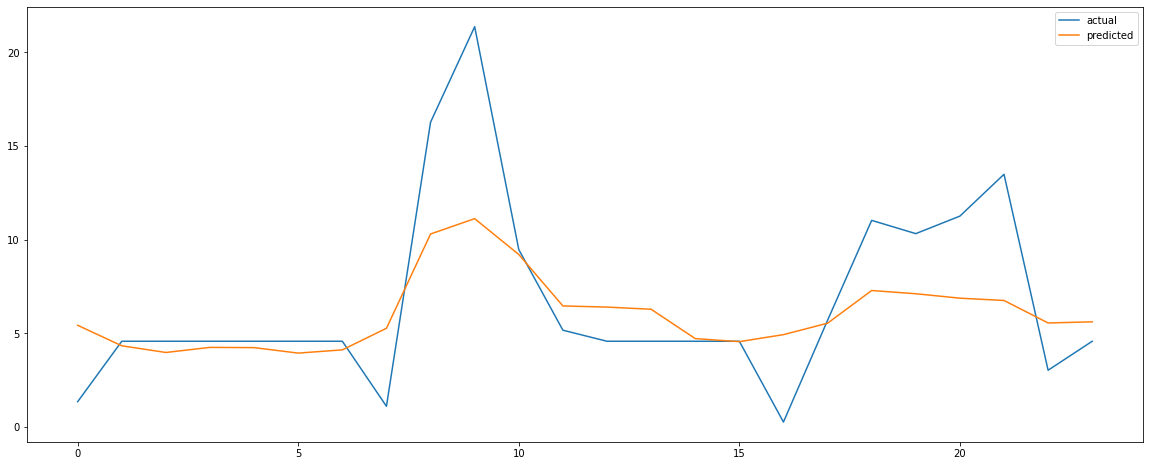

In [ ]:
predictions.plot(figsize = (20, 8))

In [ ]:
len(pred_e2d2)

53

In [ ]:
len(y_test)

53

In [ ]:
pred_e2d2.shape

(53, 1, 24)

In [ ]:
preds = []
actuals = []
for li in pred_e2d2:
  preds.extend(li)
for li in y_test:
  actuals.extend(li)


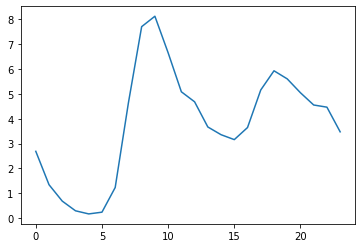

In [ ]:
plt.plot(preds[10])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7825a5590>,
      dtype=object)

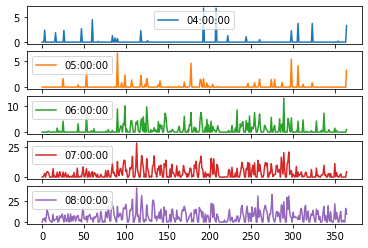

In [ ]:
df.head()

,TimeStamp,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
0,2019-01-01,0.000000,3.250489,3.279511,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,4.399657,4.284400,2.952003,0.925223,4.452825,7.288058,15.478434,13.146134,2.094545,6.263580
1,2019-01-02,6.887260,6.887260,6.887260,1.725641,0.000000,0.0,0.0,0.000000,3.803428,...,0.000000,1.480429,2.754286,1.413520,6.405930,9.419190,10.935059,7.727558,7.014205,3.479825
2,2019-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.201210,2.846237,...,2.923218,0.000000,0.000000,1.589649,5.193622,10.088968,10.057457,11.570992,13.085476,12.793345
3,2019-01-04,8.333299,3.183740,3.183740,3.183740,2.386921,0.0,0.0,2.980271,4.732664,...,3.033023,0.000000,0.000000,2.990681,8.223368,9.393388,9.778415,3.655607,8.400958,6.374644
4,2019-01-05,0.579545,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.224298,...,0.036984,3.550512,11.281494,11.281494,6.294651,2.151238,0.069630,0.000000,0.000000,0.000000


In [ ]:
vals = []
for idx, row in enumerate(df[1::]):
  vals.extend(row)

In [ ]:
df

,TimeStamp,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
0,2019-01-01,0.000000,3.250489,3.279511,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.399657,4.284400,2.952003,0.925223,4.452825,7.288058,15.478434,13.146134,2.094545,6.263580
1,2019-01-02,6.887260,6.887260,6.887260,1.725641,0.000000,0.000000,0.000000,0.000000,3.803428,...,0.000000,1.480429,2.754286,1.413520,6.405930,9.419190,10.935059,7.727558,7.014205,3.479825
2,2019-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.201210,2.846237,...,2.923218,0.000000,0.000000,1.589649,5.193622,10.088968,10.057457,11.570992,13.085476,12.793345
3,2019-01-04,8.333299,3.183740,3.183740,3.183740,2.386921,0.000000,0.000000,2.980271,4.732664,...,3.033023,0.000000,0.000000,2.990681,8.223368,9.393388,9.778415,3.655607,8.400958,6.374644
4,2019-01-05,0.579545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.224298,...,0.036984,3.550512,11.281494,11.281494,6.294651,2.151238,0.069630,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,4.308571,1.875425,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.158041,...,6.898578,1.309257,0.275829,0.445594,6.972345,8.747692,16.903700,7.711857,0.000000,0.000000
361,2019-12-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.793429,3.088883,0.000000,0.886451,3.959127,9.826169,3.961471,0.000000,0.000000,0.000000
362,2019-12-29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.348902,...,3.748805,0.727632,0.000000,5.255601,6.857616,6.857616,2.904245,17.293025,14.369476,1.892421
363,2019-12-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.103889,16.106045,...,6.490352,6.854355,7.330511,2.956811,1.775729,1.711161,8.797419,6.193866,6.208571,6.908721
